
# 🧮 Day 10 — NumPy for Computation: Scaling & Normalization

Scaling and normalization are crucial steps before training any ML model.
They ensure all numeric features contribute equally and prevent dominance by large-scale variables.



## 🎯 Objective
Learn how to scale and normalize numeric features using **NumPy** and compare with **Scikit-learn** preprocessing tools.


In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv")
data.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2



## 🔹 Step 1 — Select Numeric Columns for Scaling
We'll pick a few numeric columns for demonstration.


In [2]:

X = data[['lstat', 'rm', 'age', 'dis']].values
X[:5]


array([[ 4.98  ,  6.575 , 65.2   ,  4.09  ],
       [ 9.14  ,  6.421 , 78.9   ,  4.9671],
       [ 4.03  ,  7.185 , 61.1   ,  4.9671],
       [ 2.94  ,  6.998 , 45.8   ,  6.0622],
       [ 5.33  ,  7.147 , 54.2   ,  6.0622]])


## 🔹 Step 2 — Apply Min-Max Normalization
This rescales all features to the range [0, 1].


In [3]:

X_minmax = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
X_minmax[:5]


array([[0.08967991, 0.57750527, 0.64160659, 0.26920314],
       [0.2044702 , 0.5479977 , 0.78269825, 0.34896198],
       [0.06346578, 0.6943859 , 0.59938208, 0.34896198],
       [0.03338852, 0.65855528, 0.44181256, 0.44854459],
       [0.09933775, 0.68710481, 0.52832132, 0.44854459]])


## 🔹 Step 3 — Apply Z-Score Standardization
Centers data to mean = 0 and standard deviation = 1.


In [4]:

X_standard = (X - X.mean(axis=0)) / X.std(axis=0)
X_standard[:5]


array([[-1.0755623 ,  0.41367189, -0.12001342,  0.1402136 ],
       [-0.49243937,  0.19427445,  0.36716642,  0.55715988],
       [-1.2087274 ,  1.28271368, -0.26581176,  0.55715988],
       [-1.36151682,  1.01630251, -0.80988851,  1.07773662],
       [-1.02650148,  1.22857665, -0.51117971,  1.07773662]])


## 🔹 Step 4 — Visualize Effects of Scaling
Let's visualize the difference between original, MinMax, and Standardized data distributions.


C:\Users\vedav\AppData\Local\Temp\ipykernel_16032\1017236080.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([X[:,0], X_minmax[:,0], X_standard[:,0]], labels=['Original', 'MinMax', 'ZScore'])


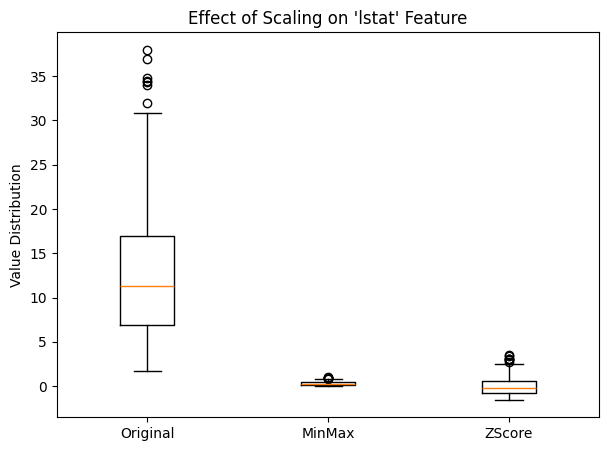

In [5]:

plt.figure(figsize=(7,5))
plt.boxplot([X[:,0], X_minmax[:,0], X_standard[:,0]], labels=['Original', 'MinMax', 'ZScore'])
plt.title("Effect of Scaling on 'lstat' Feature")
plt.ylabel("Value Distribution")
plt.show()



## 🔹 Step 5 — Compare with Scikit-learn Preprocessing
We'll check whether our manual scaling matches `sklearn`’s transformations.


In [6]:

from sklearn.preprocessing import MinMaxScaler, StandardScaler

minmax = MinMaxScaler()
stdscaler = StandardScaler()

print("Sklearn MinMax Example:\n", minmax.fit_transform(X[:5]))
print("\nSklearn StandardScaler Example:\n", stdscaler.fit_transform(X[:5]))


Sklearn MinMax Example:
 [[0.32903226 0.20157068 0.58610272 0.        ]
 [1.         0.         1.         0.44473177]
 [0.17580645 1.         0.46223565 0.44473177]
 [0.         0.7552356  0.         1.        ]
 [0.38548387 0.95026178 0.25377644 1.        ]]

Sklearn StandardScaler Example:
 [[-0.14482721 -0.93578944  0.37499336 -1.51681243]
 [ 1.83701878 -1.43238343  1.60994747 -0.34951153]
 [-0.59741223  1.03123868  0.00540856 -0.34951153]
 [-1.11669399  0.4282317  -1.37377377  1.10791774]
 [ 0.02191464  0.9087025  -0.61657563  1.10791774]]



## ✅ Key Takeaways

- **Normalization** rescales data to [0, 1], ideal for bounded models (like Neural Networks).  
- **Standardization** transforms features to mean 0 and variance 1, suitable for models assuming normal distributions (like Logistic Regression).  

> Scaling isn’t about cleaning data — it’s about aligning the numbers so your model listens to every feature equally.
